In [1]:
import pandas as pd

# Cargar el archivo (ajusta el nombre si es diferente)
df = pd.read_csv("heart_cleveland_upload.csv")

# Ver los primeros registros
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar datos
df = pd.read_csv("heart_cleveland_upload.csv")  # Cambia si tiene otro nombre
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
# Ver info general del dataset
df.info()

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB

Valores nulos por columna:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca        

In [7]:
# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)
df_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,condition,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2
0,69,1,160,234,1,131,0,0.1,1,0,False,False,False,False,True,True,False,False,False
1,69,0,140,239,0,151,0,1.8,2,0,False,False,False,False,False,False,False,False,False
2,66,0,150,226,0,114,0,2.6,0,0,False,False,False,False,False,False,True,False,False
3,65,1,138,282,1,174,0,1.4,1,1,False,False,False,False,True,True,False,False,False
4,64,1,110,211,0,144,1,1.8,0,0,False,False,False,False,True,True,False,False,False


In [9]:
# Convertir columnas booleanas a enteros (0/1)
df_encoded = df_encoded.astype(int)


In [11]:
X = df_encoded.drop('condition', axis=1)
y = df_encoded['condition']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inicializar y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Evaluación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print(f"\nPrecisión del modelo: {accuracy_score(y_test, y_pred):.2f}")


Matriz de Confusión:
[[25  7]
 [ 6 22]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60


Precisión del modelo: 0.78


C:\Users\fabia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<function matplotlib.pyplot.show(close=None, block=None)>

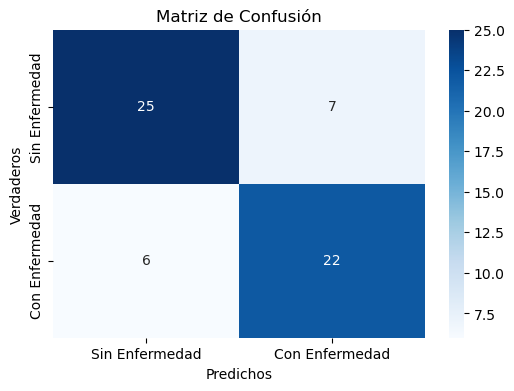

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ya deberías tener y_pred, y_test
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sin Enfermedad", "Con Enfermedad"], yticklabels=["Sin Enfermedad", "Con Enfermedad"])
plt.ylabel("Verdaderos")
plt.xlabel("Predichos")
plt.title("Matriz de Confusión")
plt.show


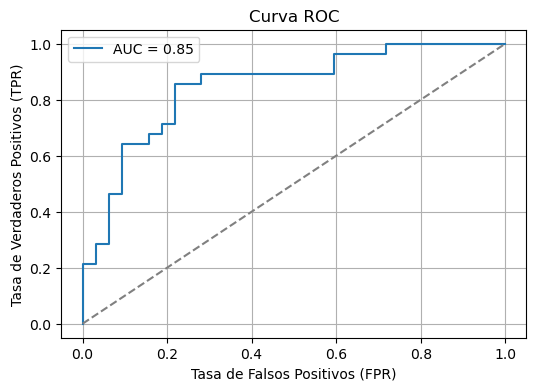

In [19]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()
